### FIR and IIR function

Please *DO NOT* run the functions below, the separate function files are saved.

In [ ]:
function sigfilter = filter_2sFIR(sig,f,fs,n,type,win)
% A two-stage FIR filter processing using the window method
%
% The  input arguments are identical to those used in FIRPM
%  sig: is the signal to be filtered arranged, each row is a measurement
%    f: a vector of cutoff frequencies in Hz. f is a number for lowpass and
%       highpass filters, and is a two-element vector for bandpass or bandstop
%       filter.
%   fs: the sampling frequency.
%    n: the order of FIR filter.
% type: 'low' for lowpass filter; 'high' for highpass filter; 
%       'bandpass' for bandpass filter; 'stop' for bandstop filter.
%  win: assign the N+1 length window vector to window the impulse response. 
%       (same way as in PWELCH). Default is hamming window.
%
%  Details of input arguments and examples, please help FIR1.
%
%  [Author]: Lu, Chia-Feng 2013.11.08

if nargin<5
    type='low';
    win=[];
elseif nargin<6
    win=[];
end

if f>=fs/2
   error('The sampling frequency is not adequent for the given cutoff frequency, please input a lower f.') 
end

if isempty(win)
    b = fir1(n,f/(fs/2),type);
else
    b = fir1(n,f/(fs/2),type,win);
end

if size(sig,2)<=3*n
    error('Signal must have length more than 3 times filter order for FILTFILT process')
end

sigfilter=[];
for i=1:size(sig,1)
    sigfilter(i,:) = filtfilt(b,1,sig(i,:));
end


In [ ]:
function sigfilter=filter_2sIIR(sig,f,fs,n,type)
% A two-stage IIR filter processing using Butterworth filter design
%
% The  input arguments are identical to those used in BUTTER
%  sig: is the signal to be filtered arranged, each row is a measurement
%    f: a vector of cutoff frequencies in Hz. f is a number for lowpass and
%       highpass filters, and is a two-element vector for bandpass or bandstop
%       filter.
%   fs: the sampling frequency.
%    n: the order of IIR filter.
% type: 'low' for lowpass filter; 'high' for highpass filter; 
%       'bandpass' for bandpass filter; 'stop' for bandstop filter.
%
%  Details of input arguments and examples, please help BUTTER.
%
%  [Author]: Lu, Chia-Feng 2013.11.08

if nargin<4
    error('Not enough input arguments! pleas check') 
elseif nargin<5
    type='low';
end

if f>=fs/2
   error('The sampling frequency is not adequent for the given cutoff frequency, please input a lower f.') 
end

if strcmpi(type,'bandpass')
    %%% highpass
    [b,a]=butter(n,f(1)/(fs/2),'high');
    sigfilter=[];
    for i=1:size(sig,1)
        sigfilter(i,:) = filtfilt(b,a,sig(i,:));
    end
    
    %%% lowpass
    [b,a]=butter(n,f(end)/(fs/2),'low');
    for i=1:size(sigfilter,1)
        sigfilter(i,:) = filtfilt(b,a,sigfilter(i,:));
    end
else
    [b,a]=butter(n,f/(fs/2),type);

    sigfilter=[];
    for i=1:size(sig,1)
        sigfilter(i,:) = filtfilt(b,a,sig(i,:));
    end
end


### Data Generation

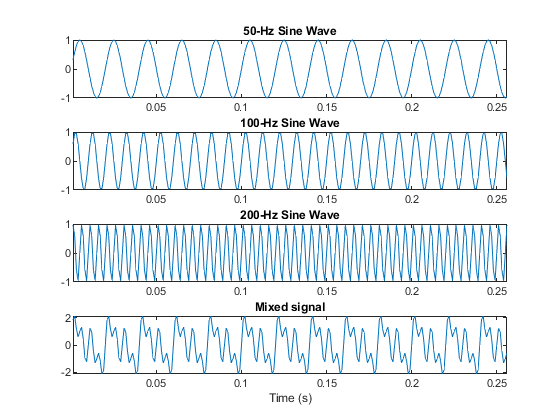

In [9]:
%% Author: Lu, Chia-Feng 2013.11.08
clear, close all

%% initialize parameters
samplerate=1000; % in Hz
N=1024; % data length

sinefreq1=50; % in Hz
sinefreq2=100; % in Hz
sinefreq3=200; % in Hz

fl=75;   % low-cutoff frequency
fh=165;  % high-cutoff frequency
forder=180;
%% generate simulated signals 
t=[1:N]/samplerate;
sig1=sin(2*pi*sinefreq1*t);
sig2=sin(2*pi*sinefreq2*t);
sig3=sin(2*pi*sinefreq3*t);

data=sig1+sig2+sig3;

figure, 
subplot(4,1,1),plot(t,sig1),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq1) '-Hz Sine Wave'])
subplot(4,1,2),plot(t,sig2),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq2) '-Hz Sine Wave'])
subplot(4,1,3),plot(t,sig3),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq3) '-Hz Sine Wave'])
subplot(4,1,4),plot(t,data),xlim([t(1) t(round(N/4))])
title(['Mixed signal'])
xlabel('Time (s)')


### FIR filter test 

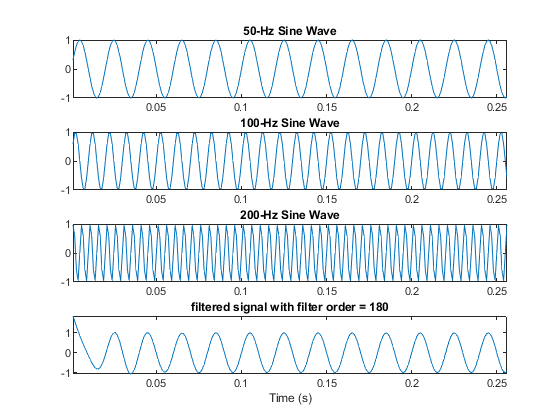

In [3]:
%% Apply 2-stage FIR filter processing
%%% lowpass filter
data_2sFIR = filter_2sFIR(data,fl,samplerate,forder,'low'); 

%%% highpass filter
% data_2sFIR = filter_2sFIR(data,fh,samplerate,forder,'high'); 

%%% bandpass filter
% data_2sFIR = filter_2sFIR(data,[fl fh],samplerate,forder,'bandpass');  

%%% bandstop filter
% data_2sFIR = filter_2sFIR(data,[fl fh],samplerate,forder,'stop');  

figure, 
subplot(4,1,1),plot(t,sig1),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq1) '-Hz Sine Wave'])
subplot(4,1,2),plot(t,sig2),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq2) '-Hz Sine Wave'])
subplot(4,1,3),plot(t,sig3),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq3) '-Hz Sine Wave'])
subplot(4,1,4),plot(t,data_2sFIR),xlim([t(1) t(round(N/4))])
title(['filtered signal with filter order = ' num2str(forder)])
xlabel('Time (s)')

### IIR filter Test

In [13]:
fl=75;   % low-cutoff frequency
fh=165;  % high-cutoff frequency
forder=6;

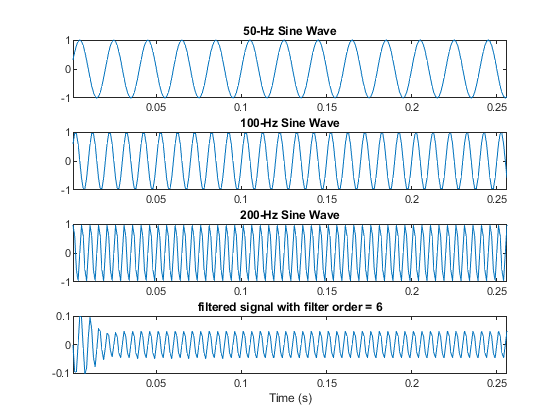

In [14]:
%% Apply 2-stage IIR filter processing
%%% lowpass filter
% data_2sIIR = filter_2sIIR(data,fl,samplerate,forder,'low'); 

%%% bandpass filter
data_2sIIR = filter_2sIIR(data,fh,samplerate,forder,'bandpass'); 

%%% highpass filter
% data_2sIIR = filter_2sIIR(data,[fl fh],samplerate,forder,'high');  

%%% bandstop filter
% data_2sIIR = filter_2sIIR(data,[fl fh],samplerate,forder,'stop');  

figure, 
subplot(4,1,1),plot(t,sig1),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq1) '-Hz Sine Wave'])
subplot(4,1,2),plot(t,sig2),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq2) '-Hz Sine Wave'])
subplot(4,1,3),plot(t,sig3),xlim([t(1) t(round(N/4))])
title([num2str(sinefreq3) '-Hz Sine Wave'])
subplot(4,1,4),plot(t,data_2sIIR),xlim([t(1) t(round(N/4))])
title(['filtered signal with filter order = ' num2str(forder)])
xlabel('Time (s)')